In [1]:
!pip install brian2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 7.2 MB/s eta 0:00:00


In [2]:
!rm -r filopodium-spine-learning
!git clone https://github.com/albesagonzalez/filopodium-spine-learning/

rm: cannot remove 'filopodium-spine-learning': No such file or directory
Cloning into 'filopodium-spine-learning'...
remote: Enumerating objects: 64, done.
remote: Counting objects: 100% (64/64), done.
remote: Compressing objects: 100% (36/36), done.
remote: Total 64 (delta 39), reused 49 (delta 24), pack-reused 0
Receiving objects: 100% (64/64), 33.43 KiB | 8.36 MiB/s, done.
Resolving deltas: 100% (39/39), done.


In [3]:
from brian2 import *

import importlib
import seaborn as sns

net_func = importlib.import_module("filopodium-spine-learning.run_network_functions")
aux = importlib.import_module("filopodium-spine-learning.aux")

coop_colour = plt.cm.tab20(6)
comp_colour = plt.cm.tab20(0)
red = plt.cm.tab20(6)
orange = plt.cm.tab20(3)
green = plt.cm.tab20(4)
filo_colour = plt.cm.tab20(14)
spine_colour = plt.cm.tab20(8)
A_colour = spine_colour
B_colour = plt.cm.tab20(2)

In [4]:
#define neuron physiological parameters
neuron_params = {}
neuron_params["C_m"] = 200*pfarad
neuron_params["R_m"] = 100*Mohm
neuron_params["tau_m"] = neuron_params["C_m"]*neuron_params["R_m"]
neuron_params["v_thres"] = -54*mV
neuron_params["v_rest"] = -70*mV
neuron_params["E_exc"] = 0*mV
neuron_params["E_inh"] = -70*mV
neuron_params["g_exc_hat"] = 0.15*nsiemens
neuron_params["g_inh_hat"] = 0.25*nsiemens
neuron_params["tau_exc"] = 5*ms
neuron_params["tau_inh"] = 5*ms

#define learning parameters
plasticity_params = {}
plasticity_params["add"] = 0
plasticity_params["mlt"] = 0
plasticity_params["a"] = 0
plasticity_params["q"] = 8
plasticity_params["mu_plus"] = 0
plasticity_params["mu_minus"] = 0
plasticity_params["tau_mu"] = 20*second
plasticity_params["mu_3"] = 1
plasticity_params["tau_plus"] = 20*ms
plasticity_params["tau_minus"] = 20*ms
plasticity_params["w0_plus"] = 1
plasticity_params["w0_minus"] = 0.5
plasticity_params["lmbda"] = 0.006
plasticity_params["alpha"] = 1.35

#define network architecture and simulation specs
simulation_params = {}
simulation_params["total_time"] = 150*second
simulation_params["integration_dt"] = 0.5*ms
simulation_params["input_dt"] = 1*second
simulation_params["w_recording_dt"] = 1*second
simulation_params["N_pre"] = 1000
simulation_params["r_pre"] = 30*Hz
simulation_params["N_post"] = 1
simulation_params["class_pools"] = False
simulation_params["w"] = 0.3
simulation_params["seed"] = 0

In [6]:
c_tot = 60
kappa = 8
current_time = 0*second
A_duration = 150*second
simulation_params["N_pre"] = 1000
patterns = []
pattern = {}
pattern["start_time"] = current_time
pattern["duration"] = A_duration
pattern["c"] = aux.get_vm_corr(0, kappa, c_tot)
pattern["c"] = c_tot*pattern["c"]/np.sum(pattern["c"])

patterns.append(pattern)
current_time += pattern["duration"]
simulation_params["total_time"] = current_time
simulation_params["c"] = aux.c_timed_array(patterns, simulation_params)
simulation_params["I_ext"] = aux.get_zero_current(simulation_params, 0)

In [7]:
plasticity_params["mu_plus"] = 0
plasticity_params["mu_minus"] = 0
plasticity_params["add"] = 0
plasticity_params["mlt"] = 0
plasticity_params["nlta"] = 0
plasticity_params["FS"] = 1
spike_ref_mon, spike_pre_mon, spike_post_mon, w_trajs_FS, mu_trajs_FS, post_mon_FS = net_func.run_FS_network(neuron_params, plasticity_params, simulation_params)
w_FS = np.mean(w_trajs_FS[:, -10:], axis=1)
filo_index_FS = np.where(w_FS < plasticity_params["w0_minus"])[0]
spine_index_FS = np.where(w_FS >= plasticity_params["w0_minus"])[0]



plasticity_params["mu_plus"] = 0
plasticity_params["mu_minus"] = 0
plasticity_params["add"] = 1
plasticity_params["mlt"] = 0
plasticity_params["nlta"] = 0
plasticity_params["FS"] = 0
spike_ref_mon, spike_pre_mon, spike_post_mon, w_trajs_add, mu_trajs_add, post_mon_add = net_func.run_FS_network(neuron_params, plasticity_params, simulation_params)
w_add = np.mean(w_trajs_add[:, -10:], axis=1)
filo_index_add = np.where(w_add < plasticity_params["w0_minus"])[0]
spine_index_add = np.where(w_add >= plasticity_params["w0_minus"])[0]

plasticity_params["mu_plus"] = 0
plasticity_params["mu_minus"] = 0
plasticity_params["add"] = 0
plasticity_params["mlt"] = 1
plasticity_params["nlta"] = 0
plasticity_params["FS"] = 0
spike_ref_mon, spike_pre_mon, spike_post_mon, w_trajs_mlt, mu_trajs_mlt, post_mon_mlt = net_func.run_FS_network(neuron_params, plasticity_params, simulation_params)
w_mlt = np.mean(w_trajs_mlt[:, -10:], axis=1)
filo_index_mlt = np.where(w_mlt < plasticity_params["w0_minus"])[0]
spine_index_mlt = np.where(w_mlt >= plasticity_params["w0_minus"])[0]


plasticity_params["mu_plus"] = 0.1
plasticity_params["mu_minus"] = 0.1
plasticity_params["add"] = 0
plasticity_params["mlt"] = 0
plasticity_params["nlta"] = 1
plasticity_params["FS"] = 0
plasticity_params["w0_minus"] = 0.
spike_ref_mon, spike_pre_mon, spike_post_mon, w_trajs_nlta, mu_trajs_nlta, post_mon_nlta = net_func.run_FS_network(neuron_params, plasticity_params, simulation_params)
w_nlta = np.mean(w_trajs_nlta[:, -10:], axis=1)
filo_index_nlta = np.where(w_nlta < plasticity_params["w0_minus"])[0]
spine_index_nlta = np.where(w_nlta >= plasticity_params["w0_minus"])[0]

plasticity_params["w0_minus"] = 0.5
spike_ref_mon, spike_pre_mon, spike_post_mon, w_trajs_nlta_star, mu_trajs_nlta_star, post_mon_nlta_star = net_func.run_FS_network(neuron_params, plasticity_params, simulation_params)
w_nlta_star = np.mean(w_trajs_nlta_star[:, -10:], axis=1)
filo_index_nlta_star = np.where(w_nlta_star < plasticity_params["w0_minus"])[0]
spine_index_nlta_star = np.where(w_nlta_star >= plasticity_params["w0_minus"])[0]

WARNING    'N_post' is an internal variable of group 'synapses', but also exists in the run namespace with the value 1. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


Starting simulation at t=0. s for a duration of 150. s
22.3545 s (14%) simulated in 10s, estimated 57s remaining.
47.073 s (31%) simulated in 20s, estimated 44s remaining.
70.077 s (46%) simulated in 30s, estimated 34s remaining.
92.9705 s (61%) simulated in 40s, estimated 25s remaining.
115.974 s (77%) simulated in 50s, estimated 15s remaining.
141.88 s (94%) simulated in 1m 0s, estimated 3s remaining.
150. s (100%) simulated in 1m 4s
Starting simulation at t=0. s for a duration of 150. s
24.2645 s (16%) simulated in 10s, estimated 52s remaining.
47.6565 s (31%) simulated in 20s, estimated 43s remaining.
73.006 s (48%) simulated in 30s, estimated 32s remaining.
97.2125 s (64%) simulated in 40s, estimated 22s remaining.
120.53 s (80%) simulated in 50s, estimated 12s remaining.
143.0415 s (95%) simulated in 1m 0s, estimated 3s remaining.
150. s (100%) simulated in 1m 2s
Starting simulation at t=0. s for a duration of 150. s
23.0405 s (15%) simulated in 10s, estimated 55s remaining.
46.3

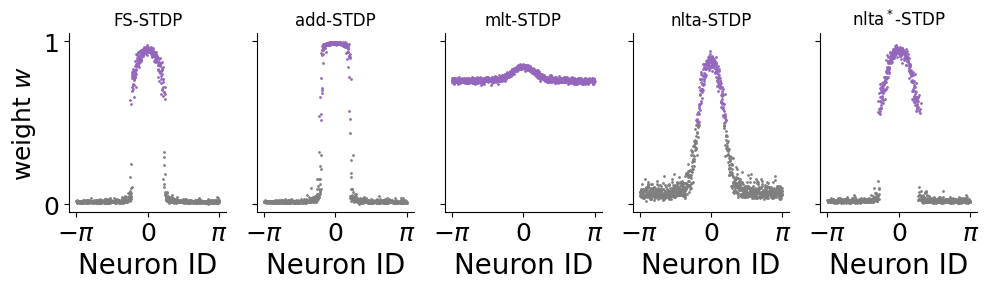

In [8]:
fig, axs = plt.subplots(1, 5,  sharey='row', figsize=(10,3))
titles = [r"FS-STDP", r"add-STDP", r"mlt-STDP",r"nlta-STDP", r"nlta$^*$-STDP"]
for ax, w_trajs, title in zip(axs, [w_trajs_FS, w_trajs_add, w_trajs_mlt, w_trajs_nlta, w_trajs_nlta_star], titles):
  w = np.mean(w_trajs[:, -10:], axis=1)
  filo_index = np.where(w < plasticity_params["w0_minus"])[0]
  spine_index = np.where(w >= plasticity_params["w0_minus"])[0]
  ax.scatter(filo_index, w[filo_index], color=filo_colour, s=1)
  ax.scatter(spine_index, w[spine_index], color=spine_colour, s=1)
  ax.set_title(title)
  ax.set_xticks([0, 500, 1000], [r"$-\pi$",  r"$0$",  r"$\pi$"], fontsize=18)
  ax.set_xlabel(r"Neuron ID", fontsize=20)
axs[0].set_yticks([0, 1], [0, 1], fontsize=18)
axs[0].set_ylabel(r"weight $w$", fontsize=18)
sns.despine()
plt.tight_layout()